# 2025/8/14 Pandas練習-股價資料清理與學生年齡計算

In [1]:
import pandas as pd
import mplfinance as mpf

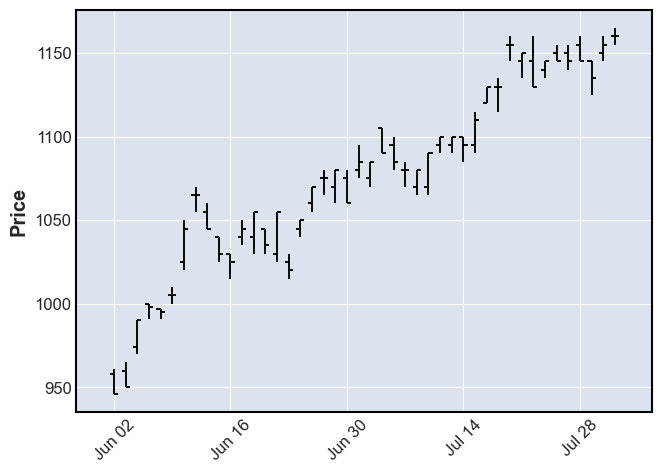

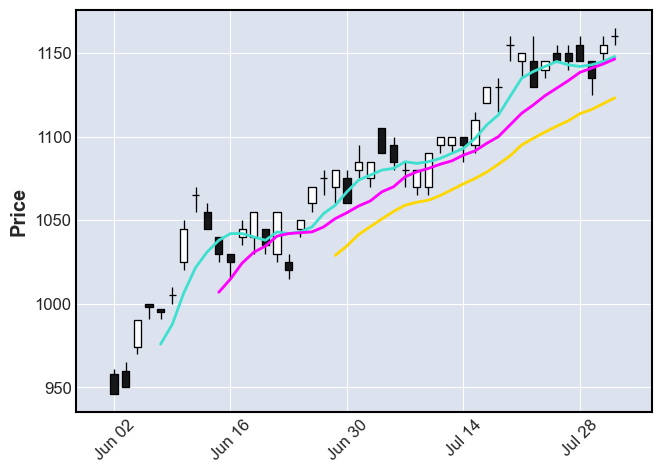

In [2]:
df=pd.read_csv(r'C:\Users\Hcedu\Desktop\0709電子電路概論c++,Arduino\python\2330\STOCK_DAY_2330_202507.csv',
               encoding='big5',thousands=',',header=1)


df = df.drop(columns=['成交金額', '漲跌價差','成交筆數','Unnamed: 9'])
# df = df.drop(index=['23,24,25,26,27'])
df = df[df['日期'].str.contains(r'[0-9]{2}/[0-9]{2}/[0-9]{2}', regex=True)]

df['國曆年'] = df['日期'].str.slice(start=0,stop=3,step=1)
df['月'] = df['日期'].str.slice(start=4,stop=6,step=1)
df['日'] = df['日期'].str.slice(start=7,stop=9,step=1)
df['西元年'] = df['國曆年'].astype('int32') + 1911
df['西元日期'] = df['西元年'].astype('string') + '/' + df['月'] + '/' + df['日']
df=df.drop(columns=['日期', '國曆年','月','日','西元年'])

df['成交股數']  = df['成交股數'].astype('int32')
df['開盤價']  = df['開盤價'].astype('float64')
df['最高價']  = df['最高價'].astype('float64')
df['最低價']  = df['最低價'].astype('float64')
df['收盤價']  = df['收盤價'].astype('float64')
df['西元日期']  = df['西元日期'].astype('datetime64[ns]')

df=df.rename(columns = {'成交股數':'Volume',
                        '開盤價':'Open',
                        '最高價':'High',
                        '最低價':'Low',
                        '收盤價':'Close',
                        '西元日期':'Date',})
df2507 = df.set_index('Date')


df=pd.read_csv(r'C:\Users\Hcedu\Desktop\0709電子電路概論c++,Arduino\python\2330\STOCK_DAY_2330_202506.csv',
               encoding='big5',thousands=',',header=1)


df = df.drop(columns=['成交金額', '漲跌價差','成交筆數','Unnamed: 9'])
# df = df.drop(index=['23,24,25,26,27'])
df = df[df['日期'].str.contains(r'[0-9]{2}/[0-9]{2}/[0-9]{2}', regex=True)]

df['國曆年'] = df['日期'].str.slice(start=0,stop=3,step=1)
df['月'] = df['日期'].str.slice(start=4,stop=6,step=1)
df['日'] = df['日期'].str.slice(start=7,stop=9,step=1)
df['西元年'] = df['國曆年'].astype('int32') + 1911
df['西元日期'] = df['西元年'].astype('string') + '/' + df['月'] + '/' + df['日']
df=df.drop(columns=['日期', '國曆年','月','日','西元年'])

df['成交股數']  = df['成交股數'].astype('int32')
df['開盤價']  = df['開盤價'].astype('float64')
df['最高價']  = df['最高價'].astype('float64')
df['最低價']  = df['最低價'].astype('float64')
df['收盤價']  = df['收盤價'].astype('float64')
df['西元日期']  = df['西元日期'].astype('datetime64[ns]')

df=df.rename(columns = {'成交股數':'Volume',
                        '開盤價':'Open',
                        '最高價':'High',
                        '最低價':'Low',
                        '收盤價':'Close',
                        '西元日期':'Date',})
df2506 = df.set_index('Date')


daily=pd.concat([df2506,df2507],axis=0)


mpf.plot(daily)
mpf.plot(daily, type='candle',mav=(5,10,20))

In [3]:
# 字串解析並存入串列結構   最後轉成 DF  使用 pandas 自己的日期處理方式

f = open('學生資料表.txt', 'r', encoding="utf8")
data_string = f.read()
f.close()

# 分割字符串為行
lines = data_string.split('\n')

# 創建學生列表（每筆資料是一個子列表）
students = []

for line in lines:
    if line.strip():  # 確保行不為空
        parts = line.split()
        # 將每行數據轉換為列表並添加到students中
        student = [
            parts[0],        # 姓名
            parts[1],        # 學號
            int(parts[2]),   # 成績一
            int(parts[3]),   # 成績二
            parts[4]         # 生日
        ]
        students.append(student)

df = pd.DataFrame( students, columns=['姓名','學號','成績一','成績二','生日'] )

df['姓名'] = df['姓名'].astype('string')
df['學號'] = df['學號'].astype('string')
df['生日'] = df['生日'].astype('datetime64[ns]')

# 使用 pandas 的向量運算計算年齡
today = pd.Timestamp.today()
df['年齡'] = today.year - df['生日'].dt.year - ( 
    (today.month < df['生日'].dt.month) | ((today.month == df['生日'].dt.month) & (today.day < df['生日'].dt.day))
    ).astype(int)

# 這樣做的好處：

# * 不需使用 `datetime.datetime` 模組，完全依賴 Pandas。
# * 計算方式是「向量化」，速度比 `apply()` 快很多，對大數據特別有效。
df

,姓名,學號,成績一,成績二,生日,年齡
0,林治宏,01,75,87,1998-05-22,27
1,陳建偉,02,60,78,2005-08-19,20
2,鍾祖培,03,61,51,2001-01-05,24
3,鄭榮仁,04,97,83,1997-09-03,27
4,廖天珩,05,75,75,2002-09-15,22
5,宋立群,06,75,70,2003-08-02,22
6,呂文凱,07,67,64,2003-12-21,21
7,吳采曄,08,50,96,1996-08-25,28
8,方品絨,09,94,82,1996-02-25,29
9,李界寬,10,69,81,1997-06-11,28
